#**How to Train YOLO11 Object Detection Model on a Custom Dataset**

Data: https://universe.roboflow.com/project-uyrxf/ppe_detection-v1x3l/dataset/1#

In [ ]:
!nvidia-smi

Wed Oct  2 14:18:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Step 01 # Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.4/881.4 kB 37.6 MB/s eta 0:00:00


**Step 02 # Import All the Requried Libraries**

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 36.6/235.7 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Detection-1 in yolov11:: 100%|██████████| 6560/6560 [00:00<00:00, 6598.84it/s]


In [ ]:
dataset.location

'/content/PPE_Detection-1'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 178MB/s]
Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/PPE_Detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

**Step # 05 Examine Training Results**

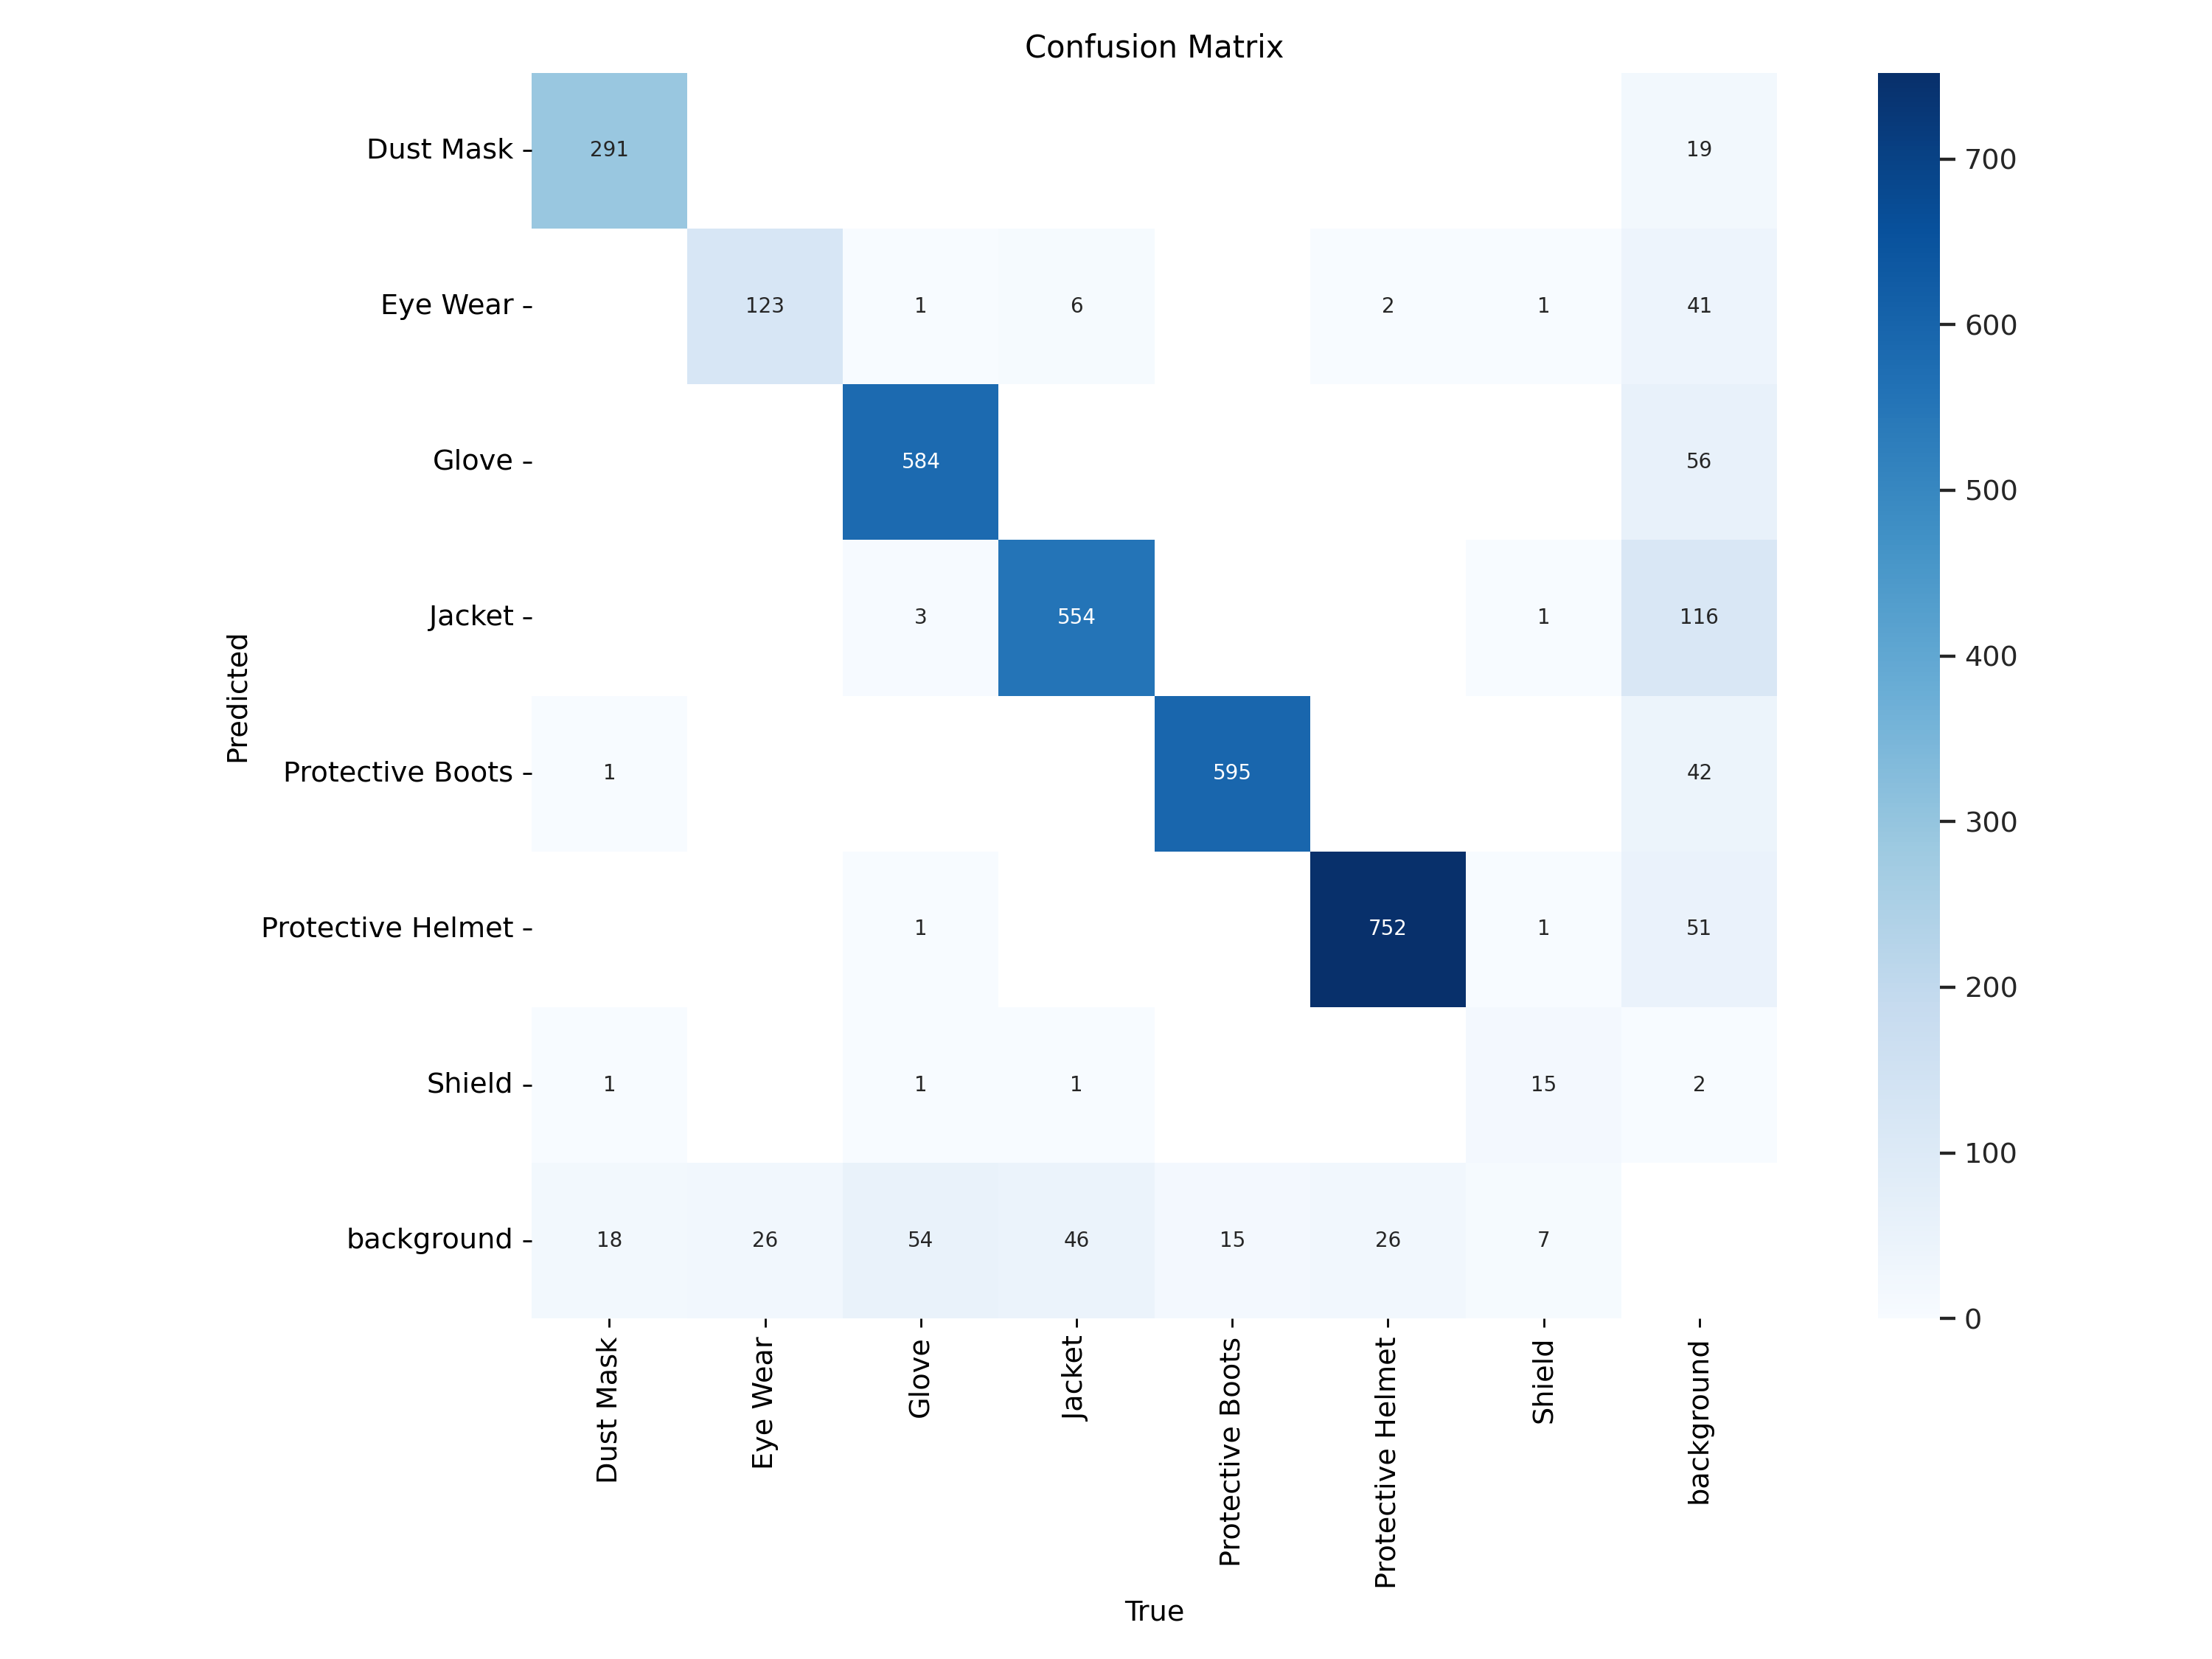

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

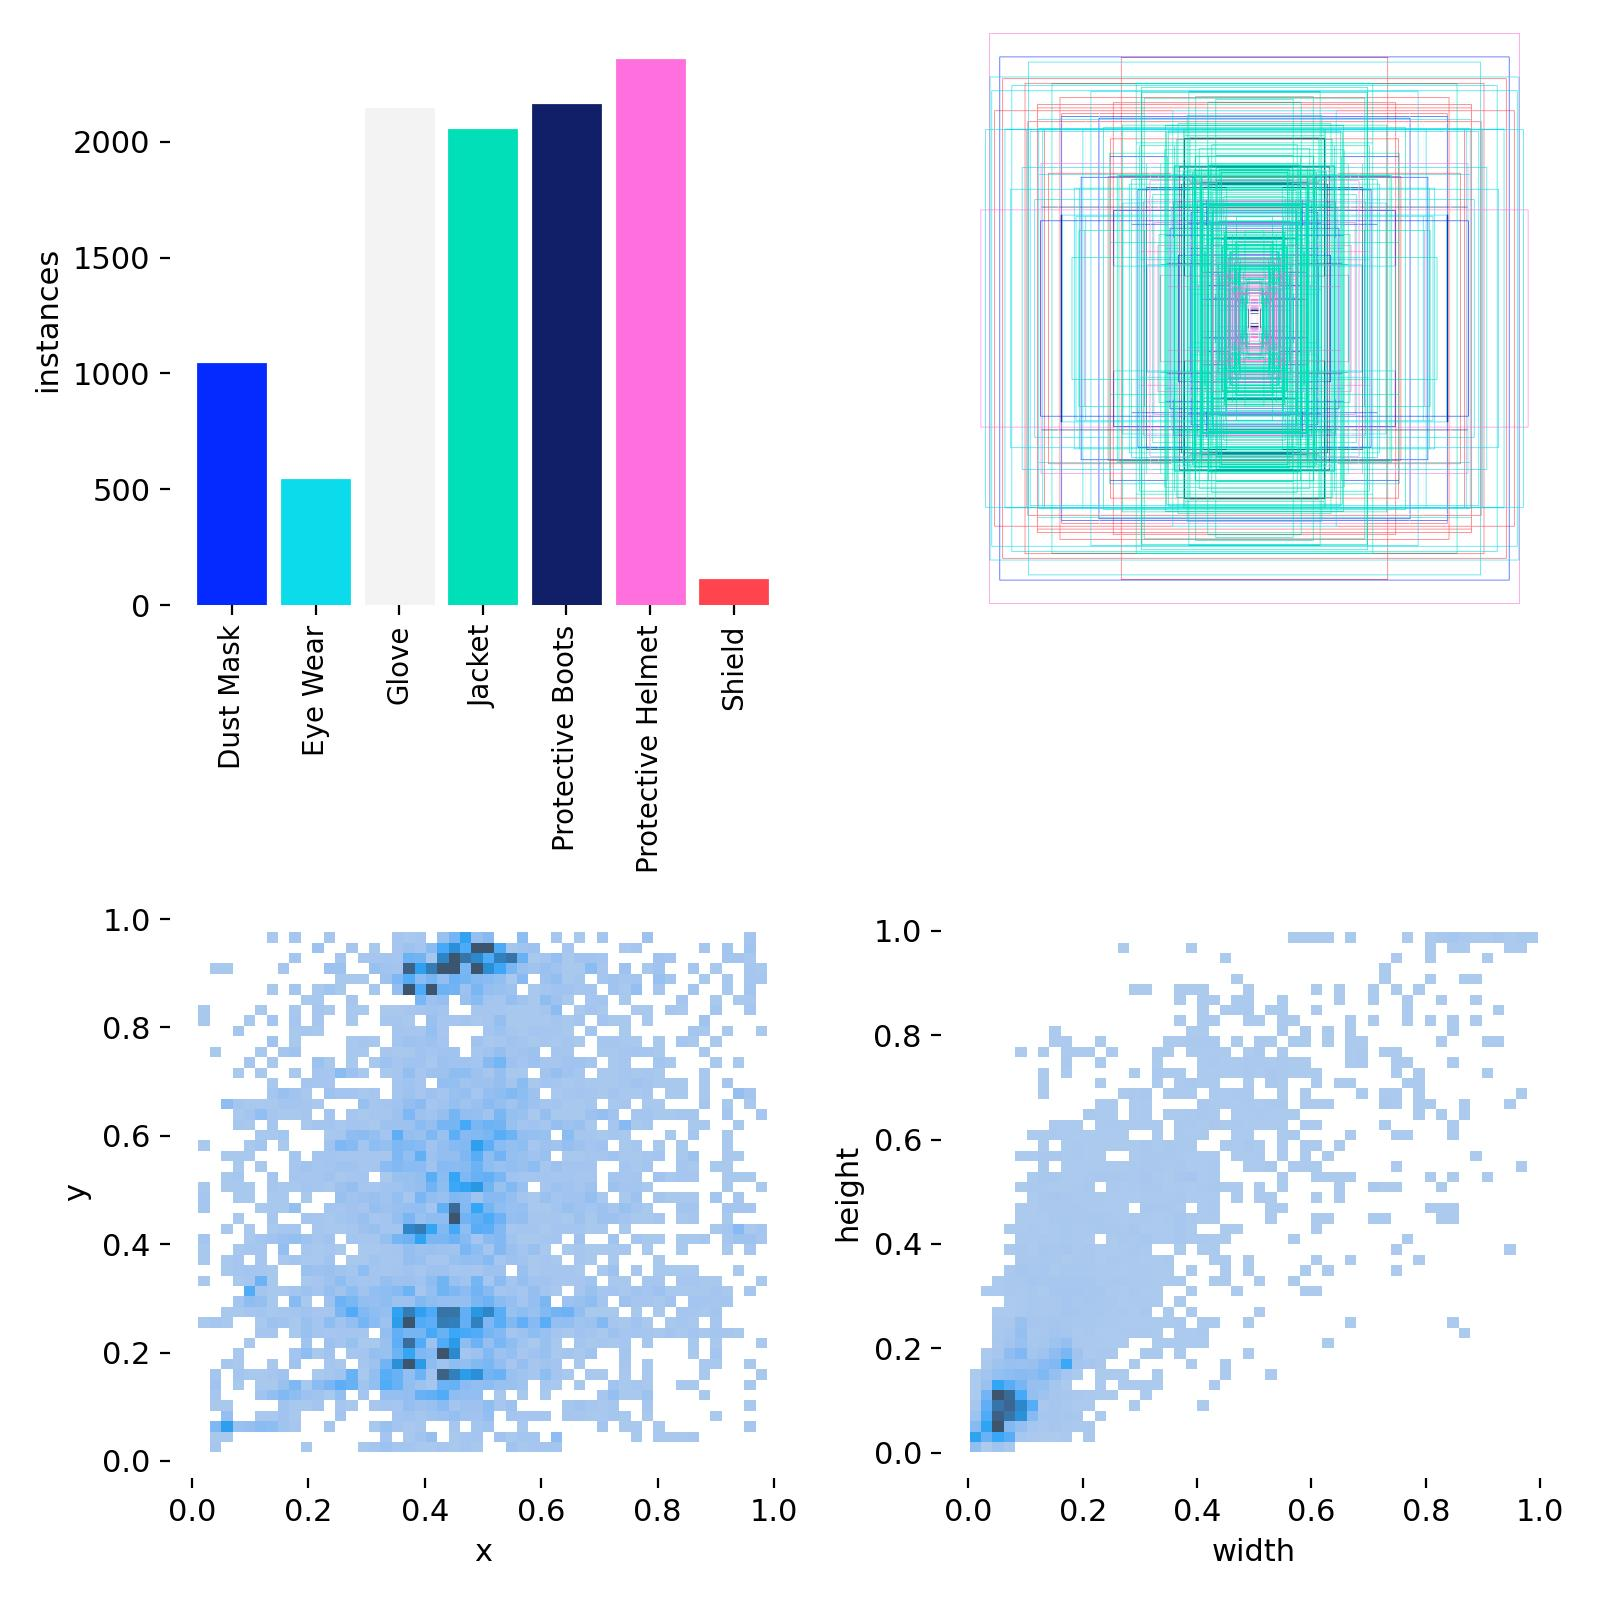

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

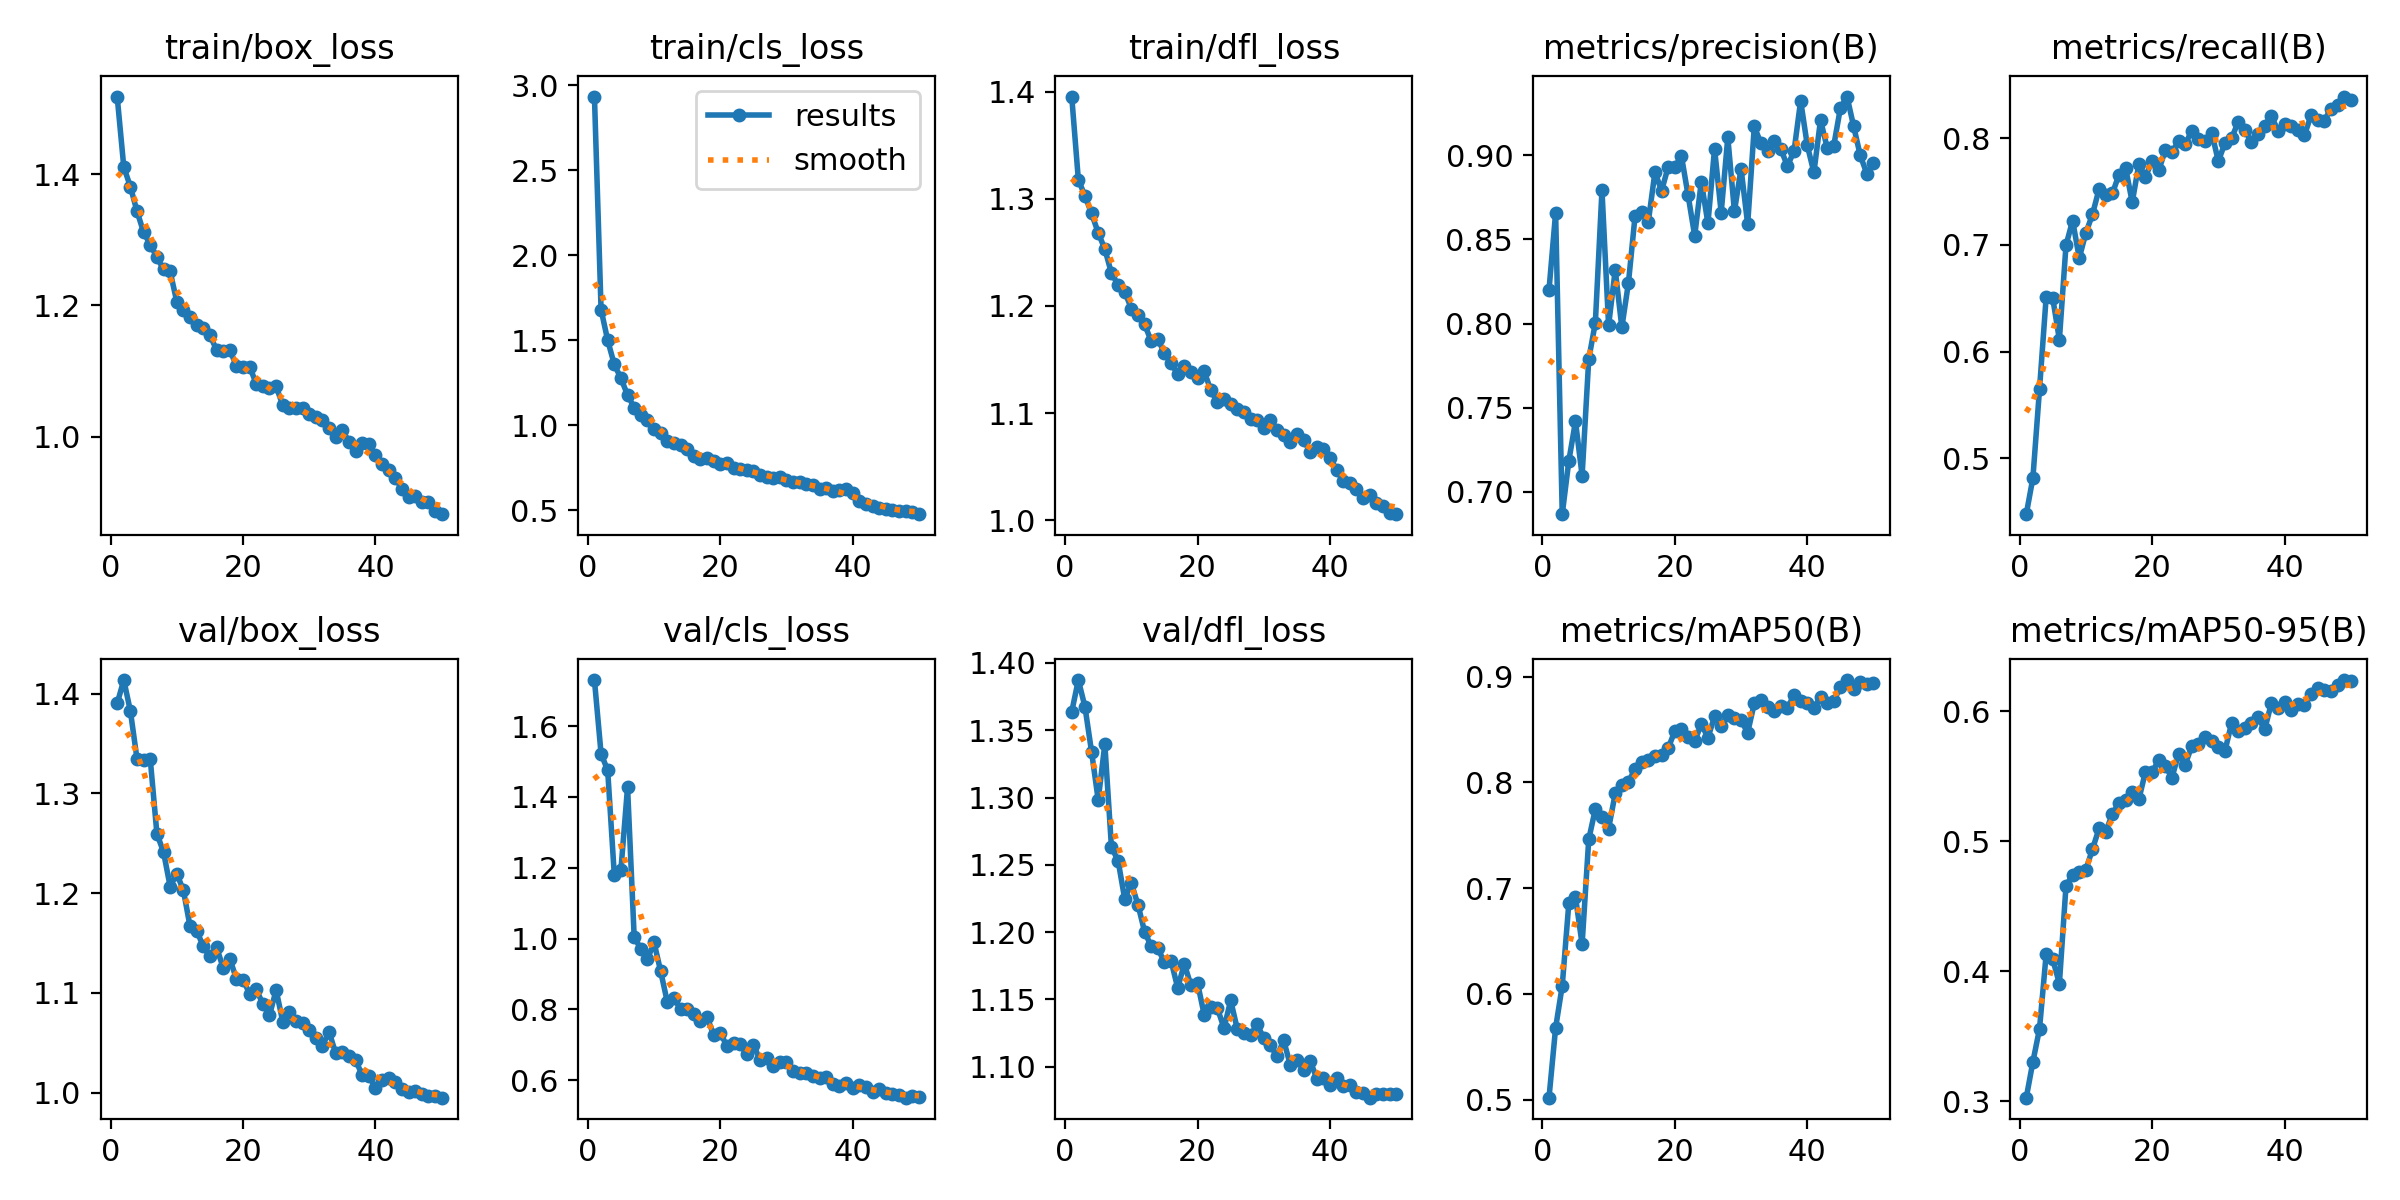

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

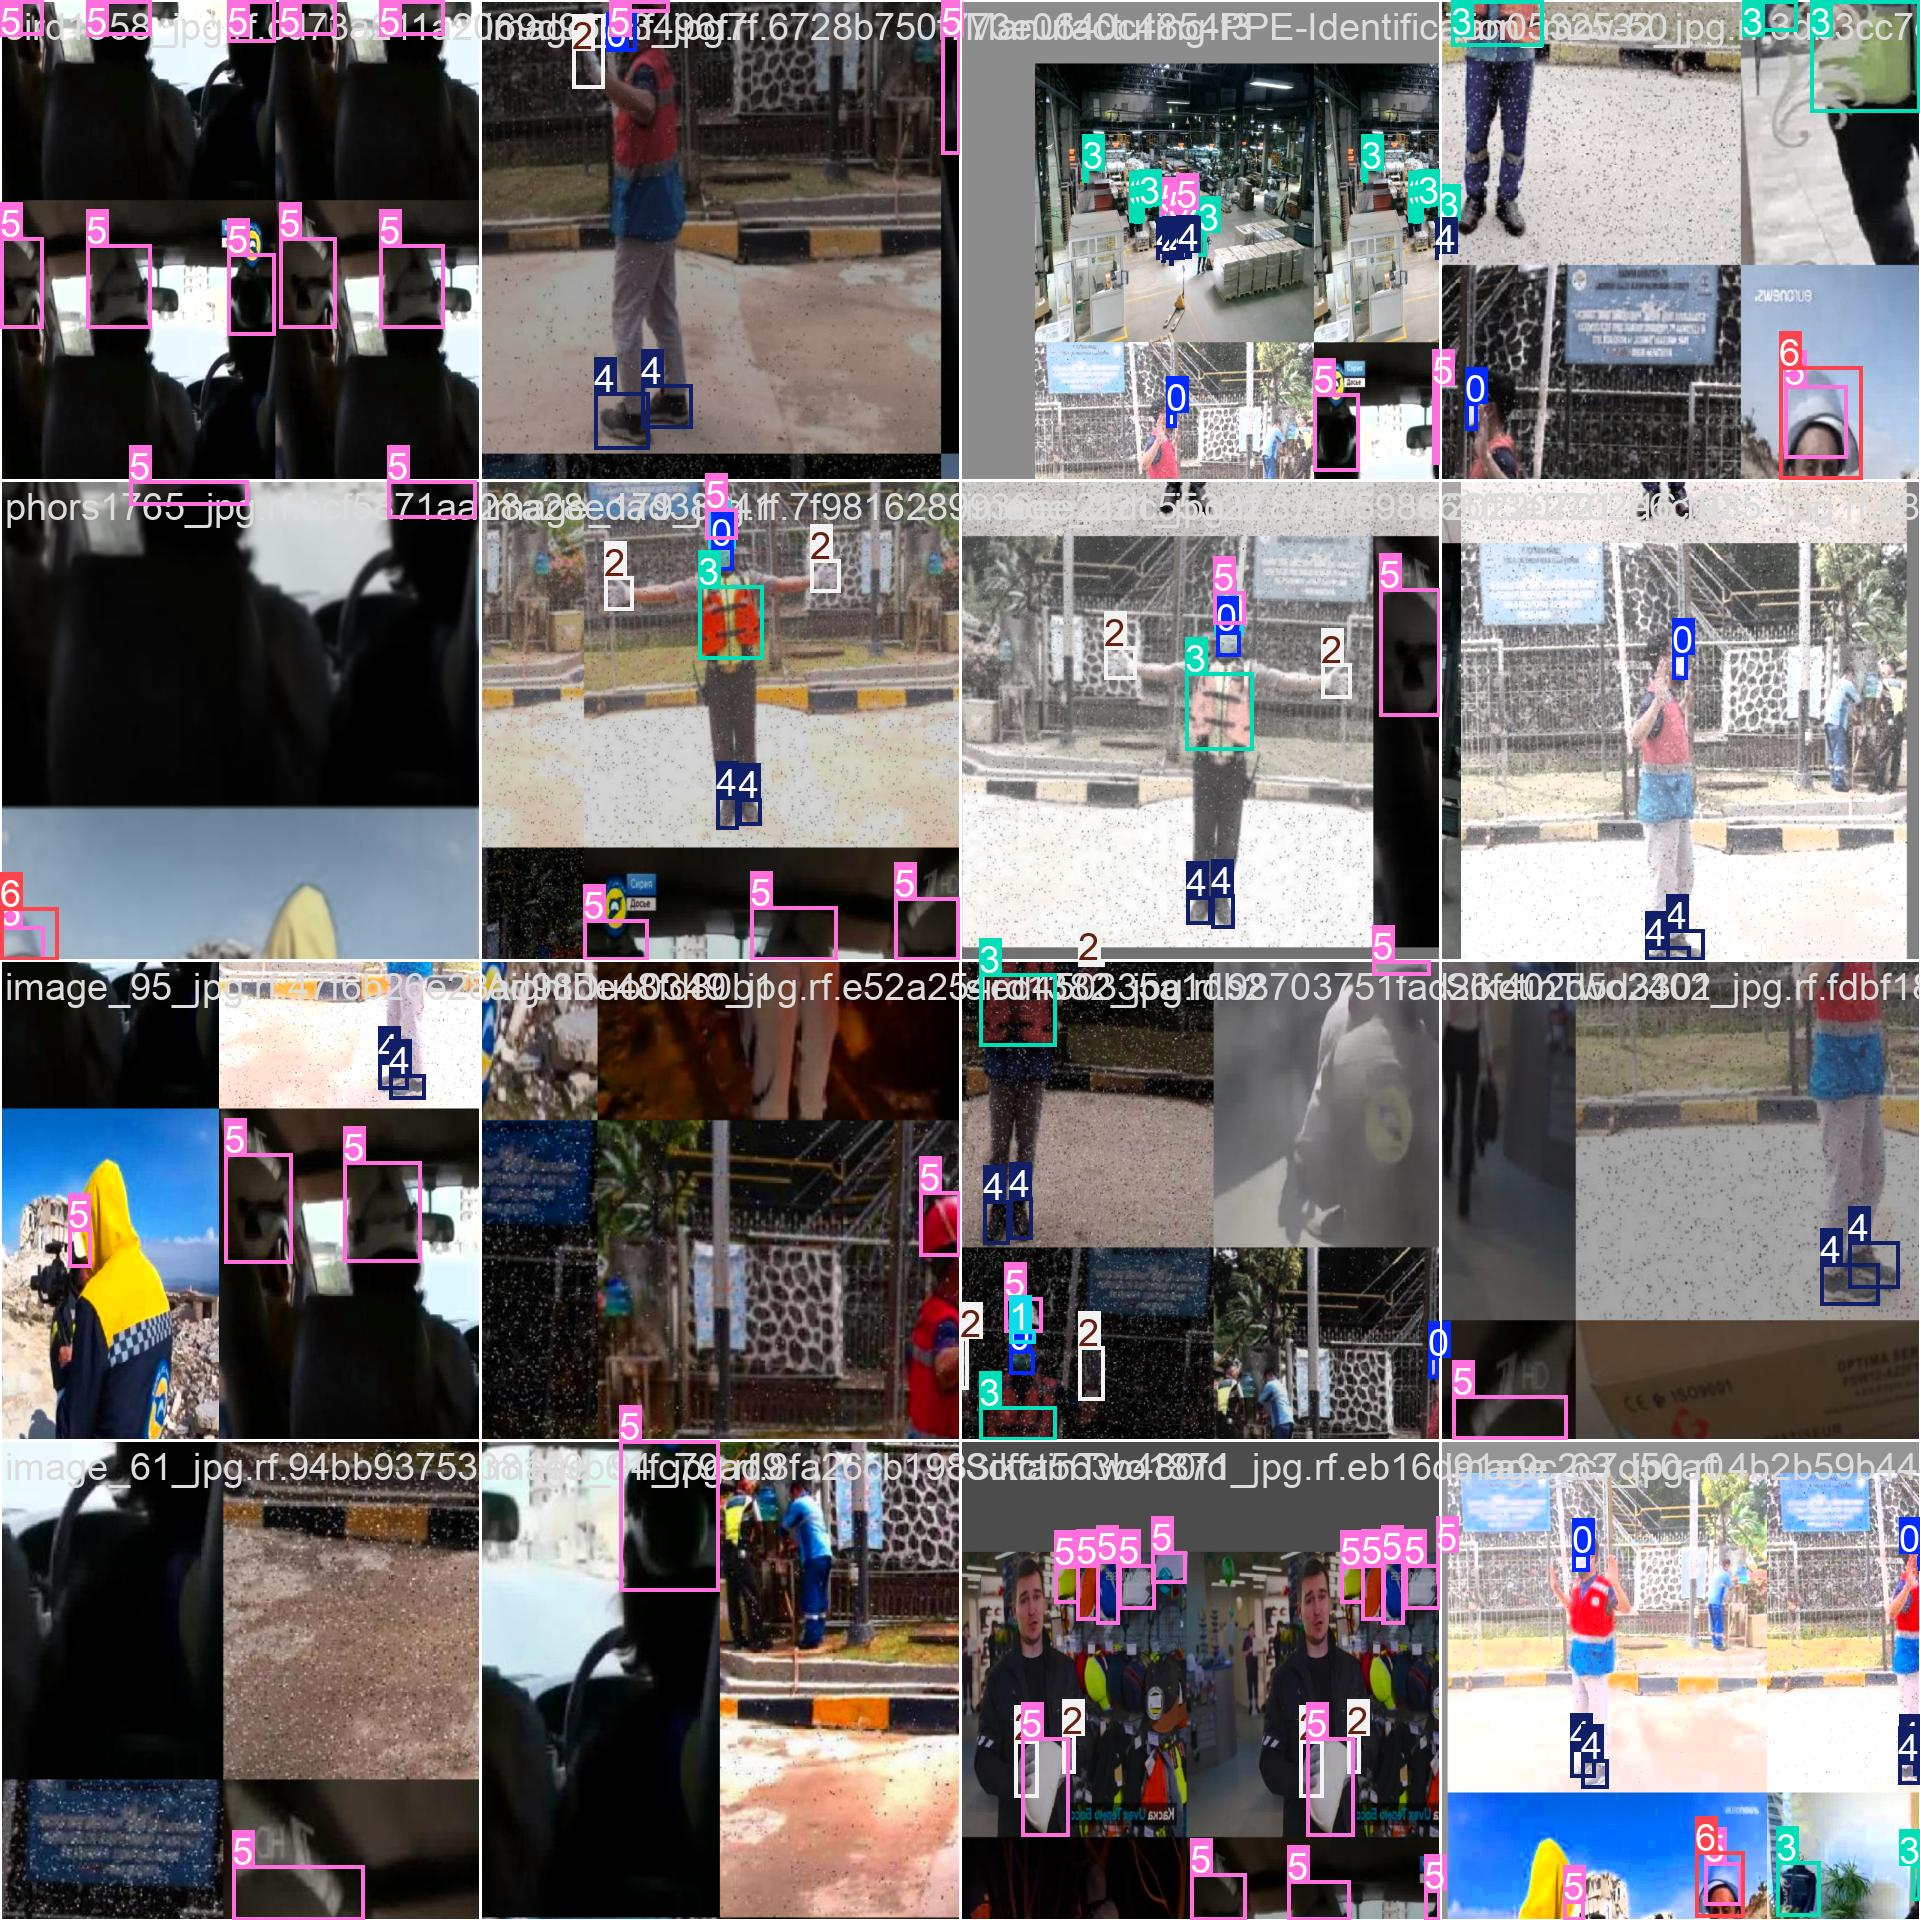

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

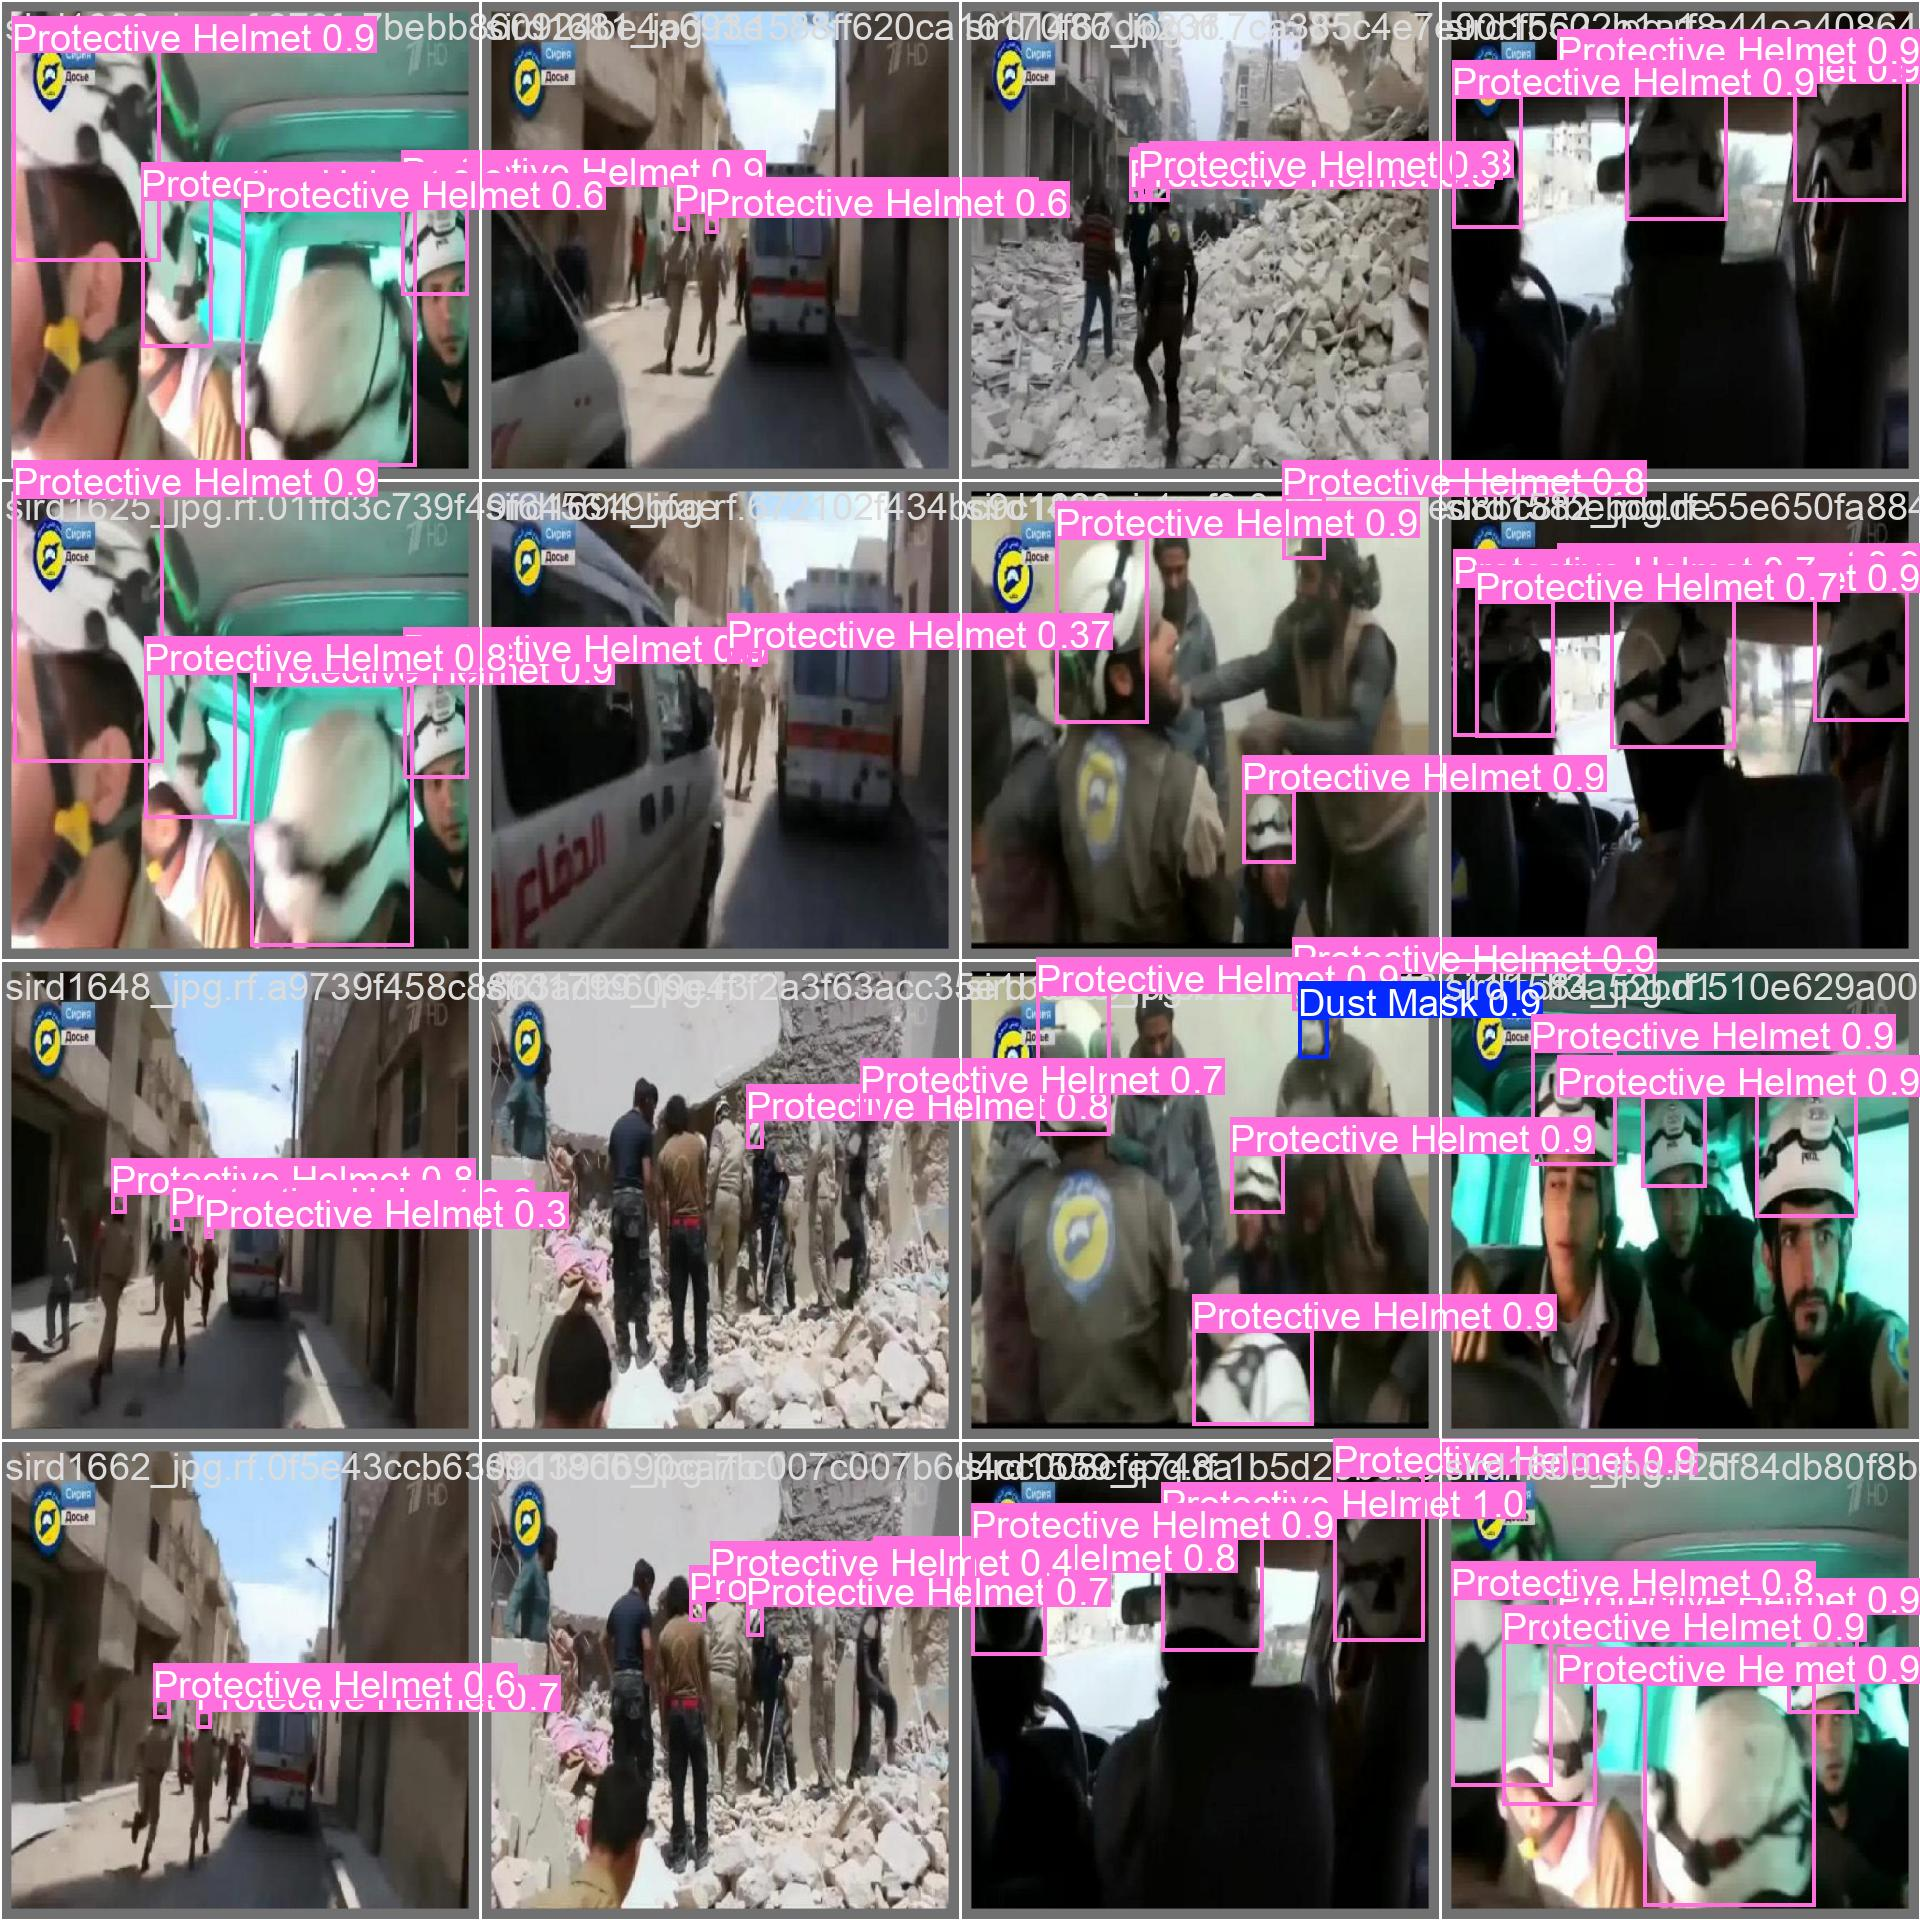

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

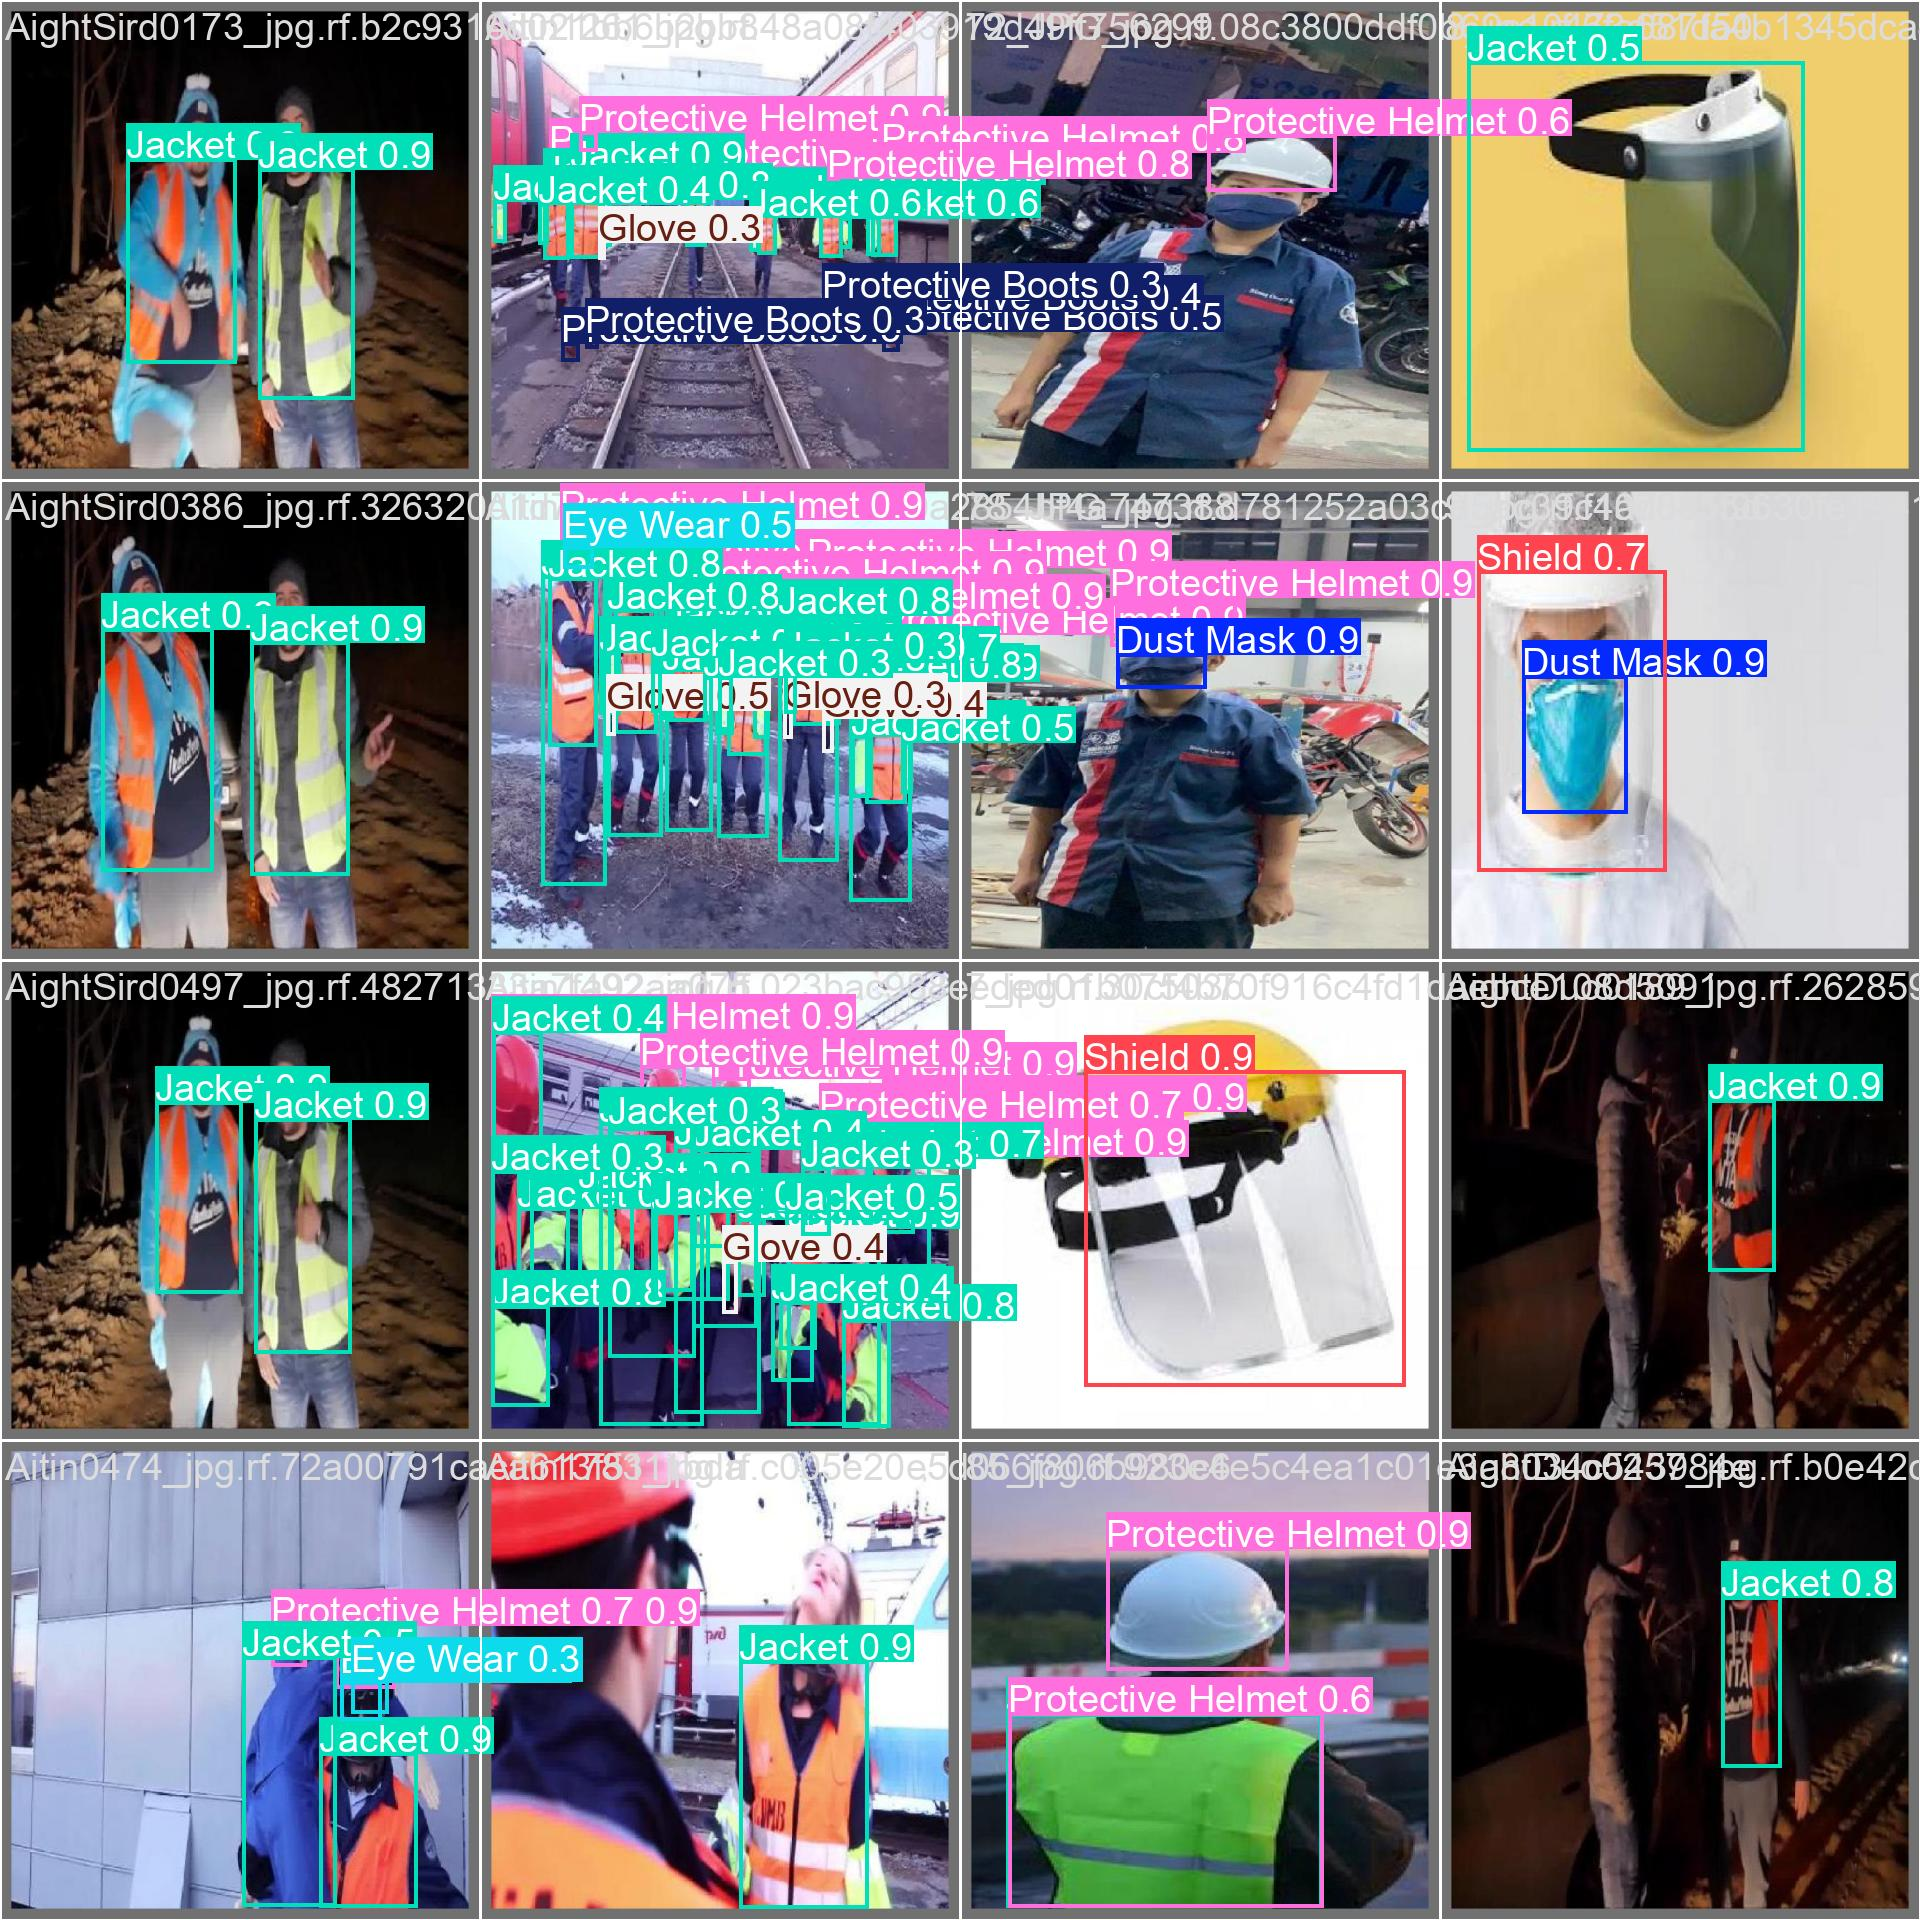

In [ ]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

**Step # 07  Validate Fine-Tuned Model**

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/PPE_Detection-1/valid/labels.cache... 649 images, 0 backgrounds, 0 corrupt: 100% 649/649 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 41/41 [00:07<00:00,  5.71it/s]
                   all        649       3126      0.889      0.839      0.893      0.625
             Dust Mask        301        311      0.969      0.918      0.956      0.656
              Eye Wear        148        149      0.854      0.745      0.807      0.457
                 Glove        354        644      0.945      0.887      0.947      0.671
                Jacket        364        607      0.892      0.896      0.938      0.723
      Protective Boots        299        610      0.957       0.96      0.981      0.702
     Protective Helmet        413        780   

**Step # 08 Inference with Custom Model on Images**

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/325 /content/PPE_Detection-1/test/images/000446_jpg.rf.5ea7ca6bde68eb546e8c3dcd1c0fd6d5.jpg: 640x640 1 Dust Mask, 1 Protective Helmet, 11.3ms
image 2/325 /content/PPE_Detection-1/test/images/20220721_161946_jpg.rf.4ff1543edb0405f57fb590d5dcb284b6.jpg: 640x640 (no detections), 10.7ms
image 3/325 /content/PPE_Detection-1/test/images/20220721_162015_jpg.rf.ee54ba7d79baa065a7cfc4666f0fd024.jpg: 640x640 1 Dust Mask, 10.6ms
image 4/325 /content/PPE_Detection-1/test/images/20220721_162036_jpg.rf.9d32aa23505a54eff5555d9b667bb597.jpg: 640x640 1 Dust Mask, 9.7ms
image 5/325 /content/PPE_Detection-1/test/images/20220721_162308_jpg.rf.2f8d1ad4716998b9fc123d94dce4d8b0.jpg: 640x640 1 Dust Mask, 4 Eye Wears, 9.1ms
image 6/325 /content/PPE_Detection-1/test/images/20220721_162435_jpg.rf.f36f898409158c65a23c0604535ff366.jpg: 640x640 

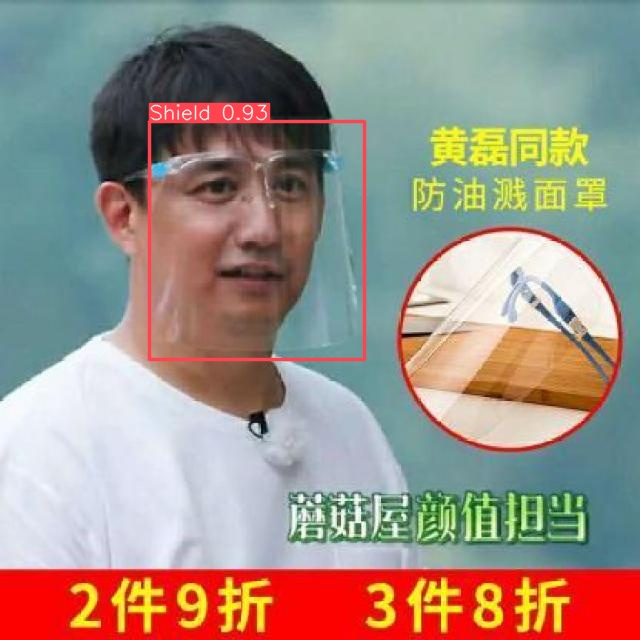

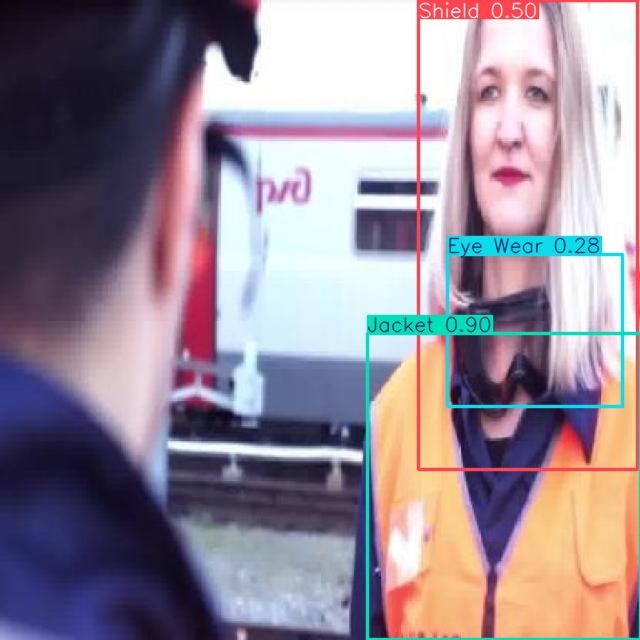

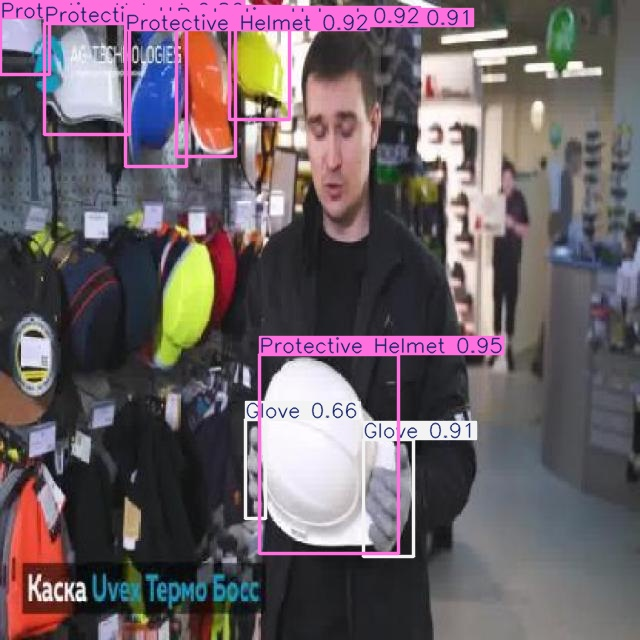

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!gdown "https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t
To: /content/image2.jpg
100% 77.7k/77.7k [00:00<00:00, 129MB/s]


In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=image2.jpg save=True

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/image2.jpg: 640x640 6 Jackets, 4 Protective Bootss, 2 Protective Helmets, 10.2ms
Speed: 2.5ms preprocess, 10.2ms inference, 558.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


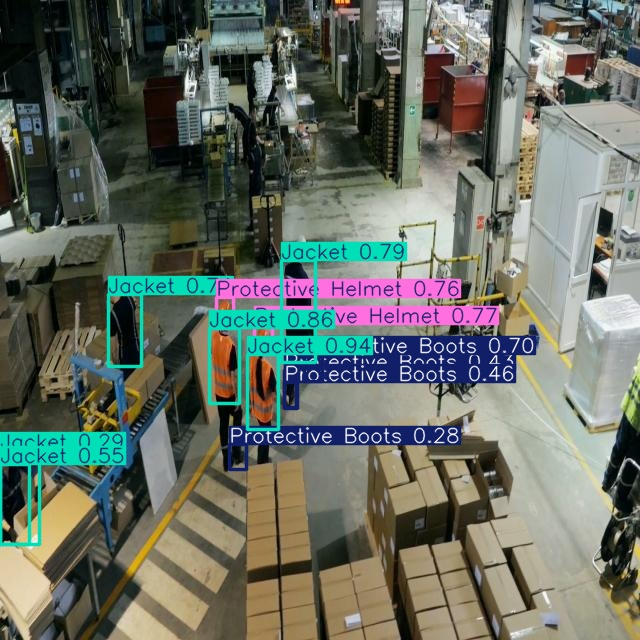

In [ ]:
Image("/content/runs/detect/predict2/image2.jpg", width=600)

**Step # 08 Inference with Custom Model on Videos**

In [ ]:
!gdown "https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t
To: /content/PPE_Part1.mp4
100% 14.2M/14.2M [00:00<00:00, 90.9MB/s]


In [ ]:
!gdown "https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t
To: /content/PPE_Part2.mp4
100% 11.1M/11.1M [00:00<00:00, 57.3MB/s]


In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="PPE_Part1.mp4" save=True

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 1 Protective Helmet, 48.5ms
video 1/1 (frame 2/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 12.5ms
video 1/1 (frame 3/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 9.5ms
video 1/1 (frame 4/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 9.2ms
video 1/1 (frame 5/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 9.9ms
video 1/1 (frame 6/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 9.6ms
video 1/1 (frame 7/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 3 Protective Helmets, 8.8ms
video 1/1 (frame 8/310) /content/PPE_Part1.mp4: 384x640 2 Jackets, 2 Protective Helmets, 9.3ms
video 1/1 (frame 9/310) /content/PPE_Part1.mp4: 384x640 5 Jackets, 2 Prote

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/PPE_Part1.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)